In [2]:

from PIL import Image

In [3]:
img=Image.open('plot4.png',r)

In [5]:
import streamlit as st

In [7]:
st.image(img,)

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

In [8]:
import pandas as pd 
import numpy as np
import seaborn as sns
import pylab as py

In [9]:
data=pd.read_csv('titanic_train.csv')

In [10]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
data_x=data.drop(['Survived','Ticket','Cabin','Name'],axis=1)

In [12]:
data_x.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,male,22.0,1,0,7.2500,S
1,2,1,female,38.0,1,0,71.2833,C
2,3,3,female,26.0,0,0,7.9250,S
3,4,1,female,35.0,1,0,53.1000,S
4,5,3,male,35.0,0,0,8.0500,S


In [13]:
data_x['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [14]:
data_x.drop('PassengerId',axis=1,inplace=True)

In [15]:
data_x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [16]:
def sex(col):
    if col =='male':
        return 1
    else:
        return 0

In [17]:
data_x['Sex']=data_x['Sex'].apply(sex)

In [18]:
data_x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,S
1,1,0,38.0,1,0,71.2833,C
2,3,0,26.0,0,0,7.9250,S
3,1,0,35.0,1,0,53.1000,S
4,3,1,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,S
887,1,0,19.0,0,0,30.0000,S
888,3,0,NaN,1,2,23.4500,S
889,1,1,26.0,0,0,30.0000,C


In [20]:
sns.set(style='darkgrid')

<AxesSubplot:>

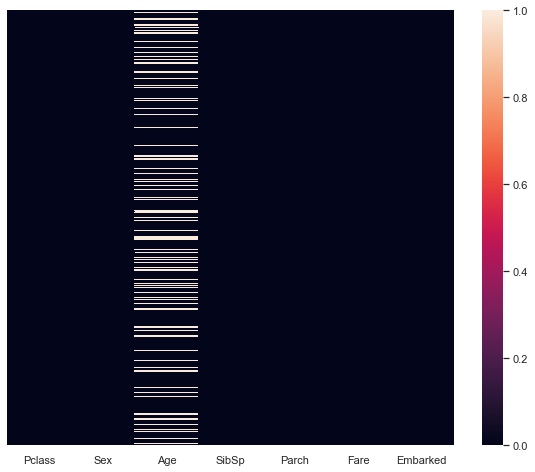

In [21]:
fig=py.figure(figsize=(10,8))
sns.heatmap(data_x.isnull(),yticklabels=False)

In [22]:
data_x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,S
1,1,0,38.0,1,0,71.2833,C
2,3,0,26.0,0,0,7.9250,S
3,1,0,35.0,1,0,53.1000,S
4,3,1,35.0,0,0,8.0500,S


In [36]:
def age(col):
    Age=col[0]
    Pclass=col[1]
    if pd.isnull(Age):
        if Pclass==1:
            return np.round(data_x.groupby('Pclass').mean()['Age'][1],1)
        elif Pclass==2:
            return np.round(data_x.groupby('Pclass').mean()['Age'][2],1)
        else:
            return np.round(data_x.groupby('Pclass').mean()['Age'][1],1)
    else:
        return Age

In [91]:
data_x['Age']=data_x[['Age','Pclass']].apply(age,axis=1)

In [92]:
data_x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,"(Age,)"
0,3,1,22.0,1,0,7.2500,S,22.0
1,1,0,38.0,1,0,71.2833,C,38.0
2,3,0,26.0,0,0,7.9250,S,26.0
3,1,0,35.0,1,0,53.1000,S,35.0
4,3,1,35.0,0,0,8.0500,S,35.0


In [95]:
data_x.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', ('Age',)], dtype='object')

In [98]:
data_x['Age']=data_x[('Age',)]

<AxesSubplot:>

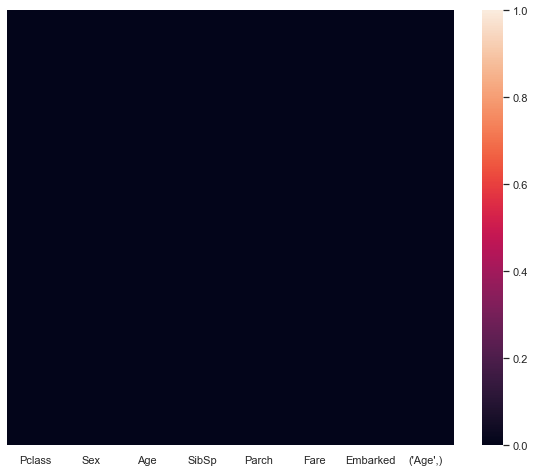

In [100]:
data_x.head()
fig=py.figure(figsize=(10,8))
sns.heatmap(data_x.isnull(),yticklabels=False)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

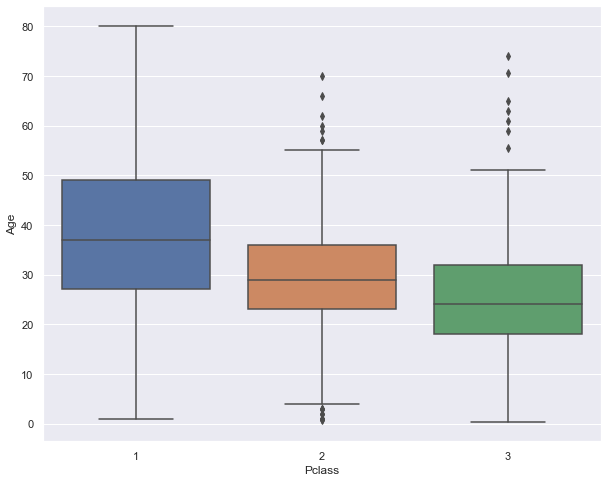

In [37]:
fig=py.figure(figsize=(10,8))
sns.boxplot(x='Pclass',y='Age',data=data_x)

In [101]:
data_x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,"(Age,)"
0,3,1,22.0,1,0,7.2500,S,22.0
1,1,0,38.0,1,0,71.2833,C,38.0
2,3,0,26.0,0,0,7.9250,S,26.0
3,1,0,35.0,1,0,53.1000,S,35.0
4,3,1,35.0,0,0,8.0500,S,35.0


In [35]:
np.round(data_x.groupby('Pclass').mean()['Age'][1],1)

38.2

In [38]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


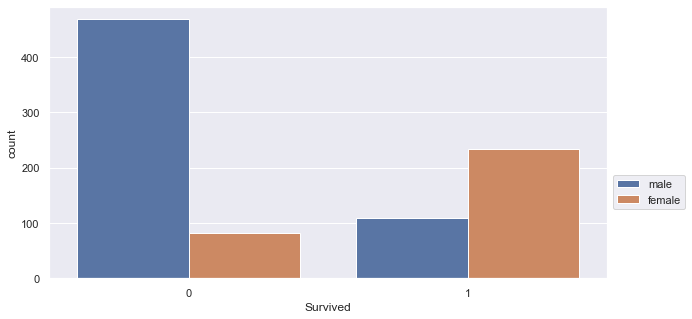

In [81]:
fig=py.figure(figsize=(10,5))
sns.countplot(x='Survived',hue='Sex',data=data)
py.legend(bbox_to_anchor=(1,0.4))

<AxesSubplot:xlabel='SibSp', ylabel='count'>

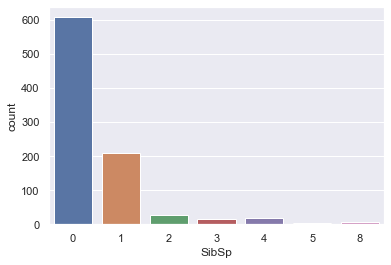

In [42]:
sns.countplot(x='SibSp',data=data)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

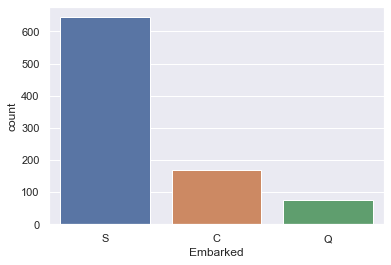

In [43]:
sns.countplot(x='Embarked',data=data)

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [45]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [46]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [105]:
data_x.drop(('Age',),axis=1,inplace=True)

In [106]:
data_x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,S
1,1,0,38.0,1,0,71.2833,C
2,3,0,26.0,0,0,7.9250,S
3,1,0,35.0,1,0,53.1000,S
4,3,1,35.0,0,0,8.0500,S


In [133]:
data_x['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [136]:
dumies=pd.get_dummies(data_x['Embarked'],drop_first=True)

In [138]:
dumies.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [144]:
X=data_x
y=data['Survived']

In [141]:
data_x[['Q_cabin','S_cabin']]=dumies
data_x.head()
data_x.drop('Embarked',axis=1,inplace=True)

In [145]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Q_cabin,S_cabin
0,3,1,22.0,1,0,7.2500,0,1
1,1,0,38.0,1,0,71.2833,0,0
2,3,0,26.0,0,0,7.9250,0,1
3,1,0,35.0,1,0,53.1000,0,1
4,3,1,35.0,0,0,8.0500,0,1
...,...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,0,1
887,1,0,19.0,0,0,30.0000,0,1
888,3,0,38.2,1,2,23.4500,0,1
889,1,1,26.0,0,0,30.0000,0,0


In [146]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y,random_state=2)

In [147]:
print(X_train.shape,X_test.shape,)

(712, 8) (179, 8)


In [155]:
from catboost import CatBoostClassifier

In [161]:
cat_model=CatBoostClassifier(scale_pos_weight=99,random_state=2,n_estimators=500)

In [162]:
n_estimators=[np.arange(100,1000,100)]

In [163]:
n_estimators
X.isnull().any()

Pclass     False
Sex        False
Age        False
SibSp      False
Parch      False
Fare       False
Q_cabin    False
S_cabin    False
dtype: bool

In [164]:
cat_model.fit(X_train,y_train)

Learning rate set to 0.016826
0:	learn: 0.6601253	total: 281ms	remaining: 2m 19s
1:	learn: 0.6258817	total: 286ms	remaining: 1m 11s
2:	learn: 0.5966188	total: 291ms	remaining: 48.2s
3:	learn: 0.5683726	total: 296ms	remaining: 36.7s
4:	learn: 0.5387889	total: 301ms	remaining: 29.8s
5:	learn: 0.5148938	total: 306ms	remaining: 25.2s
6:	learn: 0.4908950	total: 308ms	remaining: 21.7s
7:	learn: 0.4691679	total: 311ms	remaining: 19.1s
8:	learn: 0.4475058	total: 314ms	remaining: 17.1s
9:	learn: 0.4271580	total: 317ms	remaining: 15.5s
10:	learn: 0.4082890	total: 319ms	remaining: 14.2s
11:	learn: 0.3905750	total: 323ms	remaining: 13.1s
12:	learn: 0.3739722	total: 326ms	remaining: 12.2s
13:	learn: 0.3578476	total: 330ms	remaining: 11.4s
14:	learn: 0.3428559	total: 332ms	remaining: 10.7s
15:	learn: 0.3282361	total: 334ms	remaining: 10.1s
16:	learn: 0.3151414	total: 337ms	remaining: 9.57s
17:	learn: 0.3024321	total: 339ms	remaining: 9.08s
18:	learn: 0.2889794	total: 341ms	remaining: 8.63s
19:	learn

220:	learn: 0.0645295	total: 755ms	remaining: 953ms
221:	learn: 0.0644820	total: 758ms	remaining: 949ms
222:	learn: 0.0644155	total: 760ms	remaining: 944ms
223:	learn: 0.0643934	total: 762ms	remaining: 939ms
224:	learn: 0.0643819	total: 764ms	remaining: 934ms
225:	learn: 0.0643726	total: 766ms	remaining: 929ms
226:	learn: 0.0643579	total: 769ms	remaining: 924ms
227:	learn: 0.0643371	total: 772ms	remaining: 920ms
228:	learn: 0.0642711	total: 774ms	remaining: 916ms
229:	learn: 0.0642709	total: 775ms	remaining: 910ms
230:	learn: 0.0642630	total: 777ms	remaining: 905ms
231:	learn: 0.0642429	total: 779ms	remaining: 900ms
232:	learn: 0.0641826	total: 781ms	remaining: 895ms
233:	learn: 0.0641826	total: 783ms	remaining: 890ms
234:	learn: 0.0641693	total: 785ms	remaining: 885ms
235:	learn: 0.0641449	total: 787ms	remaining: 880ms
236:	learn: 0.0641376	total: 788ms	remaining: 875ms
237:	learn: 0.0641376	total: 791ms	remaining: 870ms
238:	learn: 0.0641147	total: 793ms	remaining: 866ms
239:	learn: 

381:	learn: 0.0615120	total: 1.07s	remaining: 331ms
382:	learn: 0.0614952	total: 1.07s	remaining: 328ms
383:	learn: 0.0614735	total: 1.08s	remaining: 325ms
384:	learn: 0.0614655	total: 1.08s	remaining: 322ms
385:	learn: 0.0614212	total: 1.08s	remaining: 319ms
386:	learn: 0.0614048	total: 1.08s	remaining: 316ms
387:	learn: 0.0614048	total: 1.08s	remaining: 313ms
388:	learn: 0.0613994	total: 1.09s	remaining: 311ms
389:	learn: 0.0613925	total: 1.09s	remaining: 308ms
390:	learn: 0.0613898	total: 1.09s	remaining: 305ms
391:	learn: 0.0613864	total: 1.09s	remaining: 302ms
392:	learn: 0.0613381	total: 1.1s	remaining: 299ms
393:	learn: 0.0613221	total: 1.1s	remaining: 296ms
394:	learn: 0.0613221	total: 1.1s	remaining: 293ms
395:	learn: 0.0613160	total: 1.1s	remaining: 290ms
396:	learn: 0.0612832	total: 1.11s	remaining: 287ms
397:	learn: 0.0612832	total: 1.11s	remaining: 284ms
398:	learn: 0.0612629	total: 1.11s	remaining: 281ms
399:	learn: 0.0612629	total: 1.11s	remaining: 278ms
400:	learn: 0.06

In [165]:
cat_predict=cat_model.predict(X_test)

In [170]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,"(Age,)"
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,NaN
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,NaN
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN


In [171]:
data_x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Q_cabin,S_cabin
0,3,1,22.0,1,0,7.2500,0,1
1,1,0,38.0,1,0,71.2833,0,0
2,3,0,26.0,0,0,7.9250,0,1
3,1,0,35.0,1,0,53.1000,0,1
4,3,1,35.0,0,0,8.0500,0,1


In [176]:
input=(1 ,0 ,38.0 ,1 ,0 ,71.2833 ,0 ,0)
ary_in=(np.asarray(input)).reshape(1,-1)

In [177]:
ary_in


array([[ 1.    ,  0.    , 38.    ,  1.    ,  0.    , 71.2833,  0.    ,
         0.    ]])

In [178]:
cat_model.predict(ary_in)[0]

1

In [181]:
from sklearn.metrics import classification_report , confusion_matrix

In [182]:
print(classification_report(y_test, cat_predict))

              precision    recall  f1-score   support

           0       1.00      0.01      0.02       110
           1       0.39      1.00      0.56        69

    accuracy                           0.39       179
   macro avg       0.69      0.50      0.29       179
weighted avg       0.76      0.39      0.23       179



In [183]:
print(confusion_matrix(y_test,cat_predict))

[[  1 109]
 [  0  69]]


In [244]:
from sklearn.linear_model import LogisticRegressionCV
log=LogisticRegressionCV(random_state=2,solver='liblinear')

In [245]:
log.fit(X_train,y_train)

LogisticRegressionCV(random_state=2, solver='liblinear')

In [246]:
log_model=log.predict(X_test)

In [247]:
log_model

array([0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0], dtype=int64)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

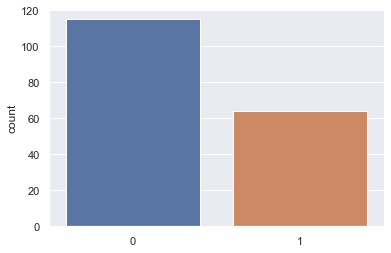

In [248]:
sns.countplot(log_model)

In [249]:
print(classification_report(y_test,log_model))

              precision    recall  f1-score   support

           0       0.82      0.85      0.84       110
           1       0.75      0.70      0.72        69

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



In [250]:
print(confusion_matrix(y_test,log_model))

[[94 16]
 [21 48]]


In [251]:
data[data['PassengerId']==495]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,"(Age,)"
494,495,0,3,"Stanley, Mr. Edward Roland",male,21.0,0,0,A/4 45380,8.05,NaN,S,NaN


In [252]:
data_x.sample()

,Pclass,Sex,Age,SibSp,Parch,Fare,Q_cabin,S_cabin
196,3,1,38.2,0,0,7.75,1,0


In [253]:
input=(3,1,38.2,0,0,14.4583,0,0)
input_ary=np.asarray(input)
in_shp=input_ary.reshape(1,-1)

In [254]:
log

LogisticRegressionCV(random_state=2, solver='liblinear')

In [255]:
log.predict(in_shp)

array([0], dtype=int64)

In [256]:
import pickle as pk

In [257]:
model_log=open('model_logistic.pkl','wb')


In [243]:
log

LogisticRegressionCV(random_state=2)

In [262]:
pk.dump(log,model_log)

In [260]:
pk.load(open('Random_Forest_Model.pkl','rb'))

RandomizedSearchCV(estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 20, 100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   verbose=3)

In [265]:
pk.load(open('model_logistic.pkl','rb'))

LogisticRegressionCV(random_state=2, solver='liblinear')

In [277]:
dat=pk.load(open('model_logistic.pkl','rb'))

In [269]:
data_x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Q_cabin,S_cabin
0,3,1,22.0,1,0,7.2500,0,1
1,1,0,38.0,1,0,71.2833,0,0
2,3,0,26.0,0,0,7.9250,0,1
3,1,0,35.0,1,0,53.1000,0,1
4,3,1,35.0,0,0,8.0500,0,1


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SibSp', ylabel='count'>

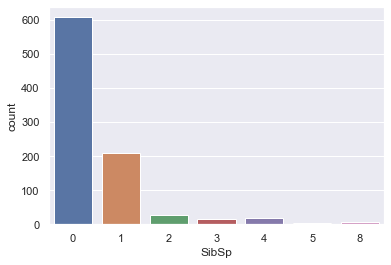

In [271]:
sns.countplot(data['SibSp'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Parch', ylabel='count'>

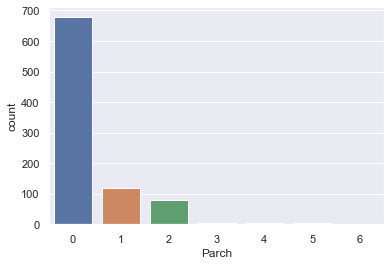

In [273]:
sns.countplot(data_x['Parch'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Q_cabin', ylabel='count'>

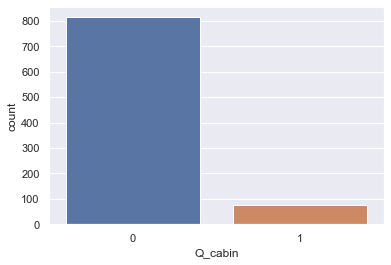

In [274]:
sns.countplot(data_x['Q_cabin'])

In [275]:
data_x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Q_cabin,S_cabin
0,3,1,22.0,1,0,7.2500,0,1
1,1,0,38.0,1,0,71.2833,0,0
2,3,0,26.0,0,0,7.9250,0,1
3,1,0,35.0,1,0,53.1000,0,1
4,3,1,35.0,0,0,8.0500,0,1


In [276]:
log

LogisticRegressionCV(random_state=2, solver='liblinear')

In [303]:
inp=(1 ,0 ,38.0 ,1, 0 ,71.2833 ,0 ,0)
inp_rs=np.asarray(inp).reshape(1,-1)

In [304]:
dat.predict_proba(inp_rs)[0][0] * 100

8.591642266967092

In [306]:
dat.predict_proba(inp_rs) * 100

array([[ 8.59164227, 91.40835773]])

In [308]:
dat.predict(inp_rs)

array([1], dtype=int64)

In [287]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,"(Age,)"
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,NaN
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,NaN
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN


In [301]:
data_x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Q_cabin,S_cabin
0,3,1,22.0,1,0,7.2500,0,1
1,1,0,38.0,1,0,71.2833,0,0
2,3,0,26.0,0,0,7.9250,0,1
3,1,0,35.0,1,0,53.1000,0,1
4,3,1,35.0,0,0,8.0500,0,1


In [5]:
def ab(a,b):
    return a + b , a-b
    